<a href="https://colab.research.google.com/github/JuanBarros2/tcc_andromedev/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title { display-mode: "form" }
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
from scipy.stats import chi2_contingency, fisher_exact
import seaborn as sns
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
import textwrap
from google.colab import drive
drive.mount('/content/drive')
path =  'drive/MyDrive/TCC_DATA/data/pre/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Resultados

Nas sessões a seguir, serão apresentados os resultados obtidos das análises realizadas com base nas métricas dos aspectos relevantes para o *Andromedev*, bem como os resultados dos testes de associação para avaliação de dependências existentes entre as respostas dos aprendizes sobre aspectos do projeto e a intenção do aprendiz de continuar a contribuir para a organização ou o projeto que teve contato durante o *Andromedev*.



## Métricas do evento

Analizando os dados obtidos do evento, é possível classifica-los em duas macro-categorias: *dados pré-evento* e *dados do evento*. 


### Dados pré-evento

In [ ]:
#@title { display-mode: "form" }
interessados = pd.read_csv(path + 'InteressadosPreviosPRE.csv')
print("Foram", interessados.shape[0], "respostas no formulário pré-evento")

Foram 107 respostas no formulário pré-evento


In [ ]:
#@title { display-mode: "form" }
aprendizes = pd.read_csv(path + 'AprendizPRE.csv')
interessados_aprovados = interessados.merge(aprendizes, on=["id_inscrito"])
print("Interessados que foram aprovados:", interessados_aprovados.shape[0])

Interessados que foram aprovados: 24


Essa categoria é composta por dados levantados através de uma consulta pública, realizada pelo OpenDevUFCG, antes do início do evento para avaliar o perfil dos participantes e auxiliar no desenvolvimento do regulamento. Ao todo, o formulário obteve 107 respostas distintas de interessados em participar do evento como aprendiz. Nesse formulário, foi levantado um questionamento sobre a motivação do interessado para entender o que o motivaria a participar do evento. Foram criadas seis categorias de motivações: *brindes*; *certificação de horas complementares*; *melhorar o meu currículo*; *no futuro, integrar o time do OpenDevUFCG*; *no futuro, ter mais oportunidades em laboratórios*; e *no futuro, ter prioridade em eventos do OpenDevUFCG*s. Para cada motivação, o entrevistado respondia com apenas uma das três opções possíveis:* considero desejável*, *considero essencial* ou *sou indiferente*.

A seguir, temos um gráfico que mostra o condensa as respostas:

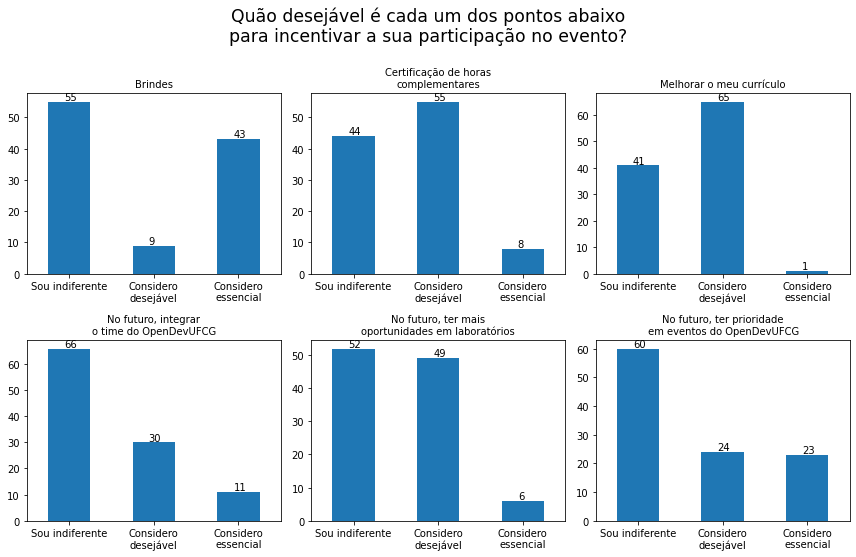

In [ ]:
#@title { display-mode: "form" }
categorical_features = ["Q" + str(i) for i in range(5,11)]
aspects = ["Brindes", "Certificação de horas\ncomplementares", \
           "Melhorar o meu currículo", "No futuro, integrar\no time do OpenDevUFCG", \
           "No futuro, ter mais\noportunidades em laboratórios", \
           "No futuro, ter prioridade\n em eventos do OpenDevUFCG"]
fig, ax = plt.subplots(2,3, figsize=(12,7))
labels =['Sou indiferente','Considero desejável','Considero essencial']
for col in range(0, len(categorical_features)):
    ax_atual = ax[int(col/3)][col % 3]
    interessados[categorical_features[col]]\
      .value_counts(sort=False)\
      .plot(kind="bar", ax=ax_atual)\
      .set_title(aspects[col], fontsize="medium")
    ax_atual\
      .set_xticklabels([textwrap.fill(label, 17) for label in labels], rotation=0)
    for i in ax_atual.patches:
      ax_atual.text(i.get_x() +(i.get_width()/2) - .06, i.get_height()+.6, s=i.get_height() , fontsize=10)
fig.tight_layout() 
fig.suptitle('Quão desejável é cada um dos pontos abaixo\npara incentivar a sua participação no evento?', y=1.1, fontsize="xx-large")
fig.show()

É possível verificar que *No futuro, ter mais oportunidades em laboratórios*, *Certificação de horas complementares* e *Melhorar o meu currículo* foram as maiores motivações dos possíveis inscritos à aprendiz no *Andromedev*. Em especial, a melhoria do currículo aparenta ser o fator mais importante dentre as opções listada por apresentar o maior número absoluto para a opção *considero essencial*, com 65 respostas, e ter o menor número absoluto para a resposta *sou indiferente*, com 41 respostas.
Em contrapartida, é possível verificar uma baixa motivação para *brindes* sendo registrado 9 respostas para a resposta *considero essencial* e 55 para a resposta *sou indiferente*. 

### Dados do evento

Uma vez finalizado o regulamento, iniciou-se o evento e foram levantados diversos formulários para extração de informações de informações básicas de projetos, inscritos e organizações, bem como as entregas exigidas em regulamento. Será subdividido as respectivas informações em *dados de inscrição e seleção* e *dados de entregas*.




#### Dados de Inscrição e Seleção

Essa categoria é composta por dados obtidos durante o processo de inscrição de projetos e seleção dos aprendizes. 


In [ ]:
#@title { display-mode: "form" }
inscritos = pd.read_csv(path + 'InscritoPRE.csv', dtype={'periodo': 'category'})

print("Foram", inscritos.shape[0], "inscritos")
print("Foram", aprendizes.shape[0], "selecionados para os", aprendizes.shape[0], "projetos")

Foram 145 inscritos
Foram 50 selecionados para os 50 projetos


Ao todo, o evento teve 145 inscritos para aprendiz em 50 projetos diferentes. É importante ressaltar que um projeto foi abandonado na fase de seleção de  aprendizes, contudo a intenção dos seus inscritos foi remanejado para outros projetos.

Tendo como referência o grupo alvo esperado pela organização, podemos avaliar duas questões levantadas no formulário de inscrição para aprendizes: a pertencência (ou não) de grupos subrepresentados na sociedade e/ou na tecnologia; e o período de ingressão à graduação em ciência da computação pela UFCG. A seguir, temos os gráficos que representam a frequência absoluta para as opções levantadas para a pergunta de múltipla escolha "*Você se identifica com algum(ns) grupo(s) subrepresentado(s) na sociedade e/ou na área de tecnologia?*":



Text(0.5, 0, 'Frequência')

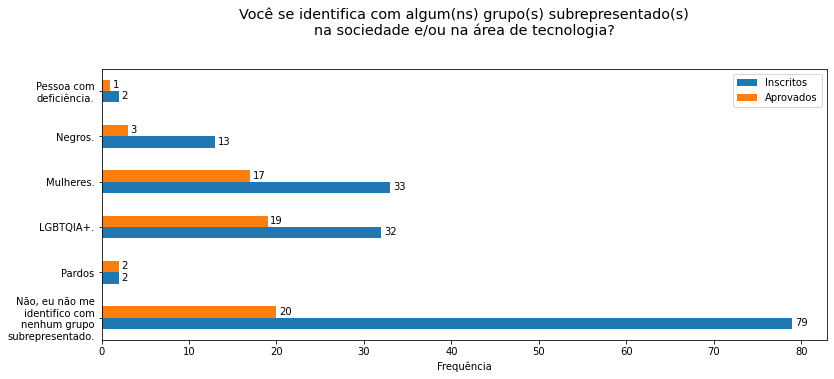

In [ ]:
#@title { display-mode: "form" }
groups = ['Não, eu não me identifico com nenhum grupo subrepresentado.', 'Pardos', 'LGBTQIA+.', 'Mulheres.', 'Negros.', 'Pessoa com deficiência.']
def add_minoritary(row):
  for group in groups:
    row[group] = group in row['Q3']
  return row
perfil_minoritario = inscritos.apply(add_minoritary, axis=1)
perfil_minoritario_aprendiz = perfil_minoritario.merge(aprendizes, on=['id_inscrito'], how="right")
d={'Inscritos': perfil_minoritario[groups].sum(),
   'Aprovados':  perfil_minoritario_aprendiz[groups].sum()}
aux = pd.DataFrame(data=d)
ax = aux.plot(kind='barh', figsize=(13,5))
ax.set_title(textwrap.fill('Você se identifica com algum(ns) grupo(s) subrepresentado(s) na sociedade e/ou na área de tecnologia?', 60), y=1.1, fontsize="x-large")
ax.set_yticklabels([textwrap.fill(label, 17) for label in groups])
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.07, \
            i.get_width(), fontsize=10)
ax.set_xlabel('Frequência')

As opções levantadas para resposta dessa questão foram: *Pessoa com deficiência*, *negros*, *mulheres*, *LGBTQIA+*, *Não, eu não me identifico com nenhum grupo subrepresentado* e um campo aberto para *Outros*. A opção *pardos* foi listada no gráfico acima para facilitar a visualização, tendo em vista que as respostas para *outros* registraram apenas essa resposta.

É possível verificar que a relação de pessoas que marcaram não se identificar com grupos subrepresentados predominou na lista de inscritos para o evento. A predominancia dessa categoria era esperado, e, através do valor absoluto dessa classe (79 inscritos), podemos afirmar que os 66 inscritos restantes se indentificam com pelo menos uma das classes listadas. Análogamente, podemos inferir que dos 50 aprovados, 30 representam participantes de grupos subrepresentados. Dessa forma, a instrução passada pela organização do Andromedev para que os mentores buscassem selecionar pessoas pertencentes a grupos subrepresentados, pareceu ser atendida, uma vez que a comparação entre aprovados e inscritos mostra um equilíbrio nas classes subrepresentadas. 

Em análise aos valores relativos a cada categoria, é possível ver que pessoas  com deficiência, mulheres, LGBTQIA+ e pardos tiveram valores de aprovação iguais a pelo menos 50%. Contudo, o grupo de pessoas que se identificam como negras teve um valor baixo de aprovações, mesmo em comparação com números absolutos do grupo. Ao todo, foram 13 pessoas inscritas mas apenas 3 foram aprovadas para o evento. 


Já em termos de período de ingressão na universidade, temos o seguinte gráfico de distribuição para os períodos que houveram inscritos:

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


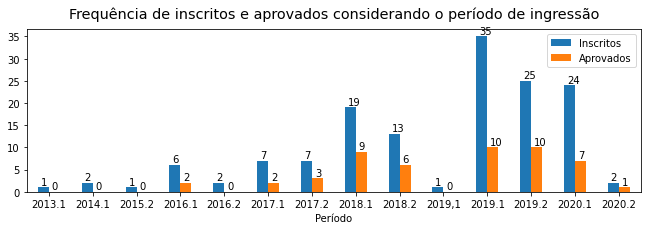

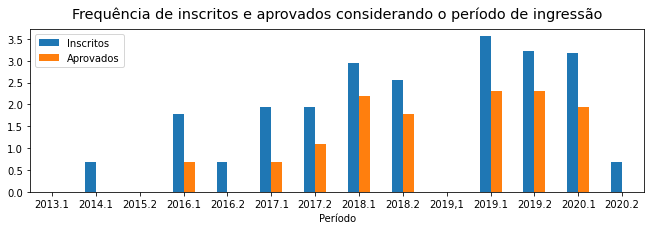

In [ ]:
#@title { display-mode: "form" }
periodos = sorted(list(set(inscritos['periodo'])))
perfil_curso_aprendiz = inscritos[['periodo', 'id_inscrito']].merge(aprendizes, on=['id_inscrito'], how="right")
d={'Inscritos': inscritos[['periodo']].groupby('periodo').size().reset_index(name='inscritos')['inscritos'],
   'Aprovados' : perfil_curso_aprendiz[['periodo']].groupby('periodo').size().reset_index(name='aprendiz')['aprendiz']}
aux = pd.DataFrame(data=d)
ax = aux.plot(kind='bar', figsize=(11,3))
ax.set_title('Frequência de inscritos e aprovados considerando o período de ingressão', fontsize="x-large", y=1.03)
ax.set_xticklabels(periodos, rotation=0)
for i in ax.patches:
    ax.text(i.get_x() +(i.get_width()/2) - .06, i.get_height()+.6, s=i.get_height() , fontsize=10)
ax.set_xlabel('Período')
fig.show()

#@title { display-mode: "form" }
periodos = sorted(list(set(inscritos['periodo'])))
perfil_curso_aprendiz = inscritos[['periodo', 'id_inscrito']].merge(aprendizes, on=['id_inscrito'], how="right")
d={'Inscritos': np.log(inscritos[['periodo']].groupby('periodo').size().reset_index(name='inscritos')['inscritos']),
   'Aprovados' : np.log(perfil_curso_aprendiz[['periodo']].groupby('periodo').size().reset_index(name='aprendiz')['aprendiz'])}
aux = pd.DataFrame(data=d)
ax = aux.plot(kind='bar', figsize=(11,3))
ax.set_title('Frequência de inscritos e aprovados considerando o período de ingressão', fontsize="x-large", y=1.03)
ax.set_xticklabels(periodos, rotation=0)
ax.set_xlabel('Período')
fig.show()

Com base no perfil esperado pelo OpenDevUFCG, é possível verificar que o evento atingiu o público esperado, sendo composto em boa parte por inscritos e aprovados dos 4 primeiros períodos (2020.2 até 2019.1). Nessa faixa de público, a maior parte dos estudantes estão iniciando o contato com o desenvolvimento de software em equipe e a experiência do evento pode ser um diferencial no currículo, alinhado com a motivação dos inscritos discutida nas sessões anteriores.

Todavia, é preciso salientar que os valores para as frequências em cada período podem ser afetadas por fatores externos que não foram mensurados no questionário de inscrição, como a limpeza de currículo ou trancamento de curso. Dessa forma, a análise poderia ser mais aprofundada se a organização tivesse realizado perguntas que explanassem sobre os fatores acima citados. 


Ainda sobre os projetos, podemos analisar a distribuição das naturezas de colaboração que foram levantadas ao serem cadastrados projetos no evento. Na submissão de um projeto, era esperado que fosse marcado alguma das categorias a seguir: *Automação de processos*, *design de interface UX*, *documentação*, *implementação de features*, *implementação de testes*, *infraestrutura* e *refatoração*. A pergunta permitia múltipla escolha e admitia um campo aberto para outras categorias, a qual recebia o texto correspondente à entrada do respondente. A relação com as frequências absolutas para cada uma das categorias pode ser visto no gráfico abaixo:

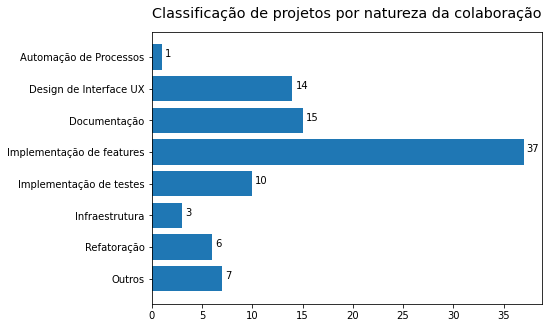

In [ ]:
#@title { display-mode: "form" }
areas = pd.read_csv(path + 'AreasPRE.csv')
labels = ["Automação de Processos",\
          "Design de Interface UX",\
          "Documentação",\
          "Implementação de features",\
          "Implementação de testes",\
          "Infraestrutura",\
          "Refatoração", \
          "Outros"]
def apply_row(row):
  if row.areas not in labels:
    row.areas = 'Outros'
  return row
areas = areas.apply(apply_row, axis=1 )
areas = areas.groupby('areas').size().reset_index(name='count')
condition = areas['areas'] == 'Outros'
areas = pd.concat([areas[condition], areas[~condition].sort_values(by=['areas'],ascending=False)])
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Classificação de projetos por natureza da colaboração', fontsize="x-large", y=1.03)
ax.barh(areas['areas'], areas['count'])
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.4, \
            i.get_width(), fontsize=10)

In [ ]:
areas = pd.read_csv(path + 'AreasPRE.csv')
areas = areas.groupby('areas').size().reset_index(name='size')
areas[~areas['areas'].isin(labels)]

,areas,size
0,Análise de dados,2
1,Análise e visualização de dados,1
2,Aprendizagem de máquina,1
4,Desenvolvimento do site do Centro Acadêmico,1
7,Front-End,1
12,desenvolvimento de página web,1


A classe que obteve a maior frequência em projetos foi a *implementação de features*, estando presente em 38 projetos dos 50 totais. Em seguida, temos *documentação* com 16 registros, *design de interface UX* com 14 e *implementação de testes* com 11. Na categoria outros, as respostas foram divididas entre áreas de análise e visualização de dados, aprendizado de máquina e desenvolvimento de páginas web.

Tendo em vista a distribuição das áreas, estas parecem terem entrado em concordância com o que foi estabelecido em regulamento, sendo possível adicionar, também, a categoria de análise de dados para abarcar as categorias faltantes.

#### Dados de entregas

Essa categoria é composta por dados obtidos durante o período de desenvolvimento do evento, pós-seleção. Aqui estão condensados as respostas registradas para os seguintes questionários: *entrega final*, *entregas parciais* e *feedbacks semanais*.  

In [ ]:
#@title { display-mode: "form" }
ef_aprendiz = pd.read_csv(path + 'EF_AprendizPRE.csv')
ef_mentoria = pd.read_csv(path + 'EF_MentoriaPRE.csv')
fs_aprendiz = pd.read_csv(path + 'FS_AprendizPRE.csv')
fs_mentoria = pd.read_csv(path + 'FS_MentoriaPRE.csv')
print("Foram realizados", ef_aprendiz[ef_aprendiz['data'].notna()].shape[0], "registros de entregas final por aprendizes")
print("Foram realizados", ef_mentoria[ef_mentoria['data'].notna()].shape[0], "registros de entregas final por mentores")
print("Foram realizados", fs_aprendiz[fs_aprendiz['atraso'].notna()].shape[0], "registros de feedback semanal por aprendizes")
print("Foram realizados", fs_mentoria[fs_mentoria['atraso'].notna()].shape[0], "registros de feedback semanal por mentores")

Foram realizados 41 registros de entregas final por aprendizes
Foram realizados 33 registros de entregas final por mentores
Foram realizados 196 registros de feedback semanal por aprendizes
Foram realizados 188 registros de feedback semanal por mentores


##### Entrega Semanal

Os *feedbacks semanais* acompanharam os projetos durante todo o evento. Neles, aprendizes e mentores registraram semanalmente o andamento dos seus progressos em relação ao seu respectivo projeto. Dessa forma, era esperado que semanalmente mentores e aprendizes registrassem uma resposta para esse questionário. A seguir, temos um gráfico que relaciona a quantidade de respostas registradas e a semana do evento a qual era esperada a submissão:

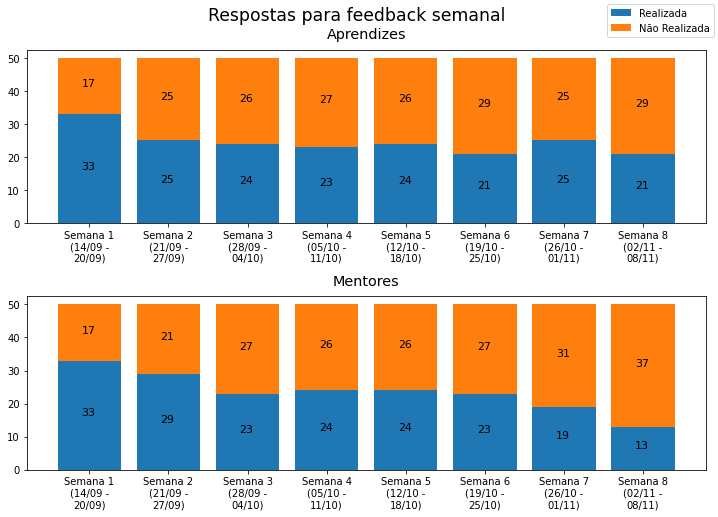

In [ ]:
#@title { display-mode: "form" }
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

def build_grafico(ax, title, df):
  df['entrega'] = df['atraso'].notna()
  count = df[['semana','entrega']].groupby(by=['semana','entrega'], dropna=False).size().reset_index(name='count')
  faltas_df = count[count['entrega'] == False]
  entregas_df = count[count['entrega'] == True]
  labels = sorted(list(set(df['semana'])))

  ax.set_title(title, fontsize="x-large", y=1.03)
  ax.bar(labels, entregas_df['count'], label='Realizada')
  ax.bar(labels, faltas_df['count'], label='Não Realizada',bottom=entregas_df['count'])
  ax.set_xticklabels([textwrap.fill(label, 12) for label in labels])
  
  for i in ax.patches:
      ax.text(i.get_x() + (i.get_width()/2) - .1, i.get_y() + (i.get_height()/2) - .1, \
              i.get_height(), fontsize=11)
build_grafico(ax[0],"Aprendizes", fs_aprendiz)
build_grafico(ax[1],"Mentores", fs_mentoria)
fig.legend(*fig.axes[-1].get_legend_handles_labels(), loc = 'upper right')
fig.tight_layout() 
fig.suptitle('Respostas para feedback semanal', y=1.02, fontsize="xx-large")
fig.show()

Analizando o gráfico para os valores de aprendizes a tendência ilustrada nos gráficos, é possível identificar uma queda na quantidade de respostas a medida que o evento foi passando. Passada a primeira semana, pelo menos 50% dos aprendizes não realizaram a submissão da resposta para o acompanhamento semanal, demonstrando uma baixa adesão dos aprendizes em relação a esta entrega. Os registros para as semanas seguintes ocilam entre 24 a 21 respostas registradas. O mesmo comportamento de queda é notado no gráfico para mentores, contudo tendo sua queda a partir da segunda semana de submissão, tendo valores que ocilaram de 24 a 13 registros. Levando em consideração as respostas  de mentores para melhorias a serem aplicadas para próximas edições, levantada nas outras entregas, podemos dar como um dos motivos a dificuldade para o preenchimento do formulário. Em um comentário para a primeira entrega parcial, destacamos o seguinte relato: 

> *Estou achando um pouco confusa o feedback semanal. Acho que a organização (OpenDevUFCG) poderia mandar o form semanalmente referente à semana em questão.
Eu me confundi bastante com isso, acredito que tenha feito mais de uma vez uma semana, pulei várias.*

Além disso, também foi realizado uma sugestão de melhoria que ajudasse a notificar sobre o prazo das entregas:

> *Adicionar no calendário das pessoas as entregas semanais. Sei que é uma responsabilidade de gerenciamento de cada projeto, mas com certeza é um adicional que melhoraria as coisas e não é tão complicado de ser implementado.*

Com isso posto, a entrega semanal pode ser feita visando a remoção de barreiras, tais como opções que poderiam ser automatizadas e estratégias de notificação para os prazos.

##### TODO Análise sobre atrasos e sobre perspectiva de importancia



##### Entregas Parciais

In [ ]:
#@title { display-mode: "form" }
ep1 = pd.read_csv(path + 'EP1PRE.csv')
ep2 = pd.read_csv(path + 'EP2PRE.csv')
print("Foram realizados", ep1[ep1['data'].notna()].shape[0], "registros de primeira entrega parcial por projetos")
print("Foram realizados", ep2[ep2['data'].notna()].shape[0], "registros de segunda entrega parcial por projetos")


Foram realizados 45 registros de primeira entrega parcial por projetos
Foram realizados 44 registros de segunda entrega parcial por projetos




Essa entrega corresponde aos formulários realizados durante a execução do evento sendo feita apenas uma submissão por projeto. Em análise a esta entrega, tivemos um valor maior de submissões. Nas duas entregas parciais, foram registradas, respectivamente, 45 e 44 submissões, representando um total de 88% e 90% de participação. Para entender a evolução dos projetos no evento, foi registrado a seguinte pergunta nesse formulário: *As atividades do ciclo inicialmente definidas, foram concluídas como o esperado?*. O gráfico a seguir, representa o levantamento das respostas para as duas entregas parciais para essa pergunta:


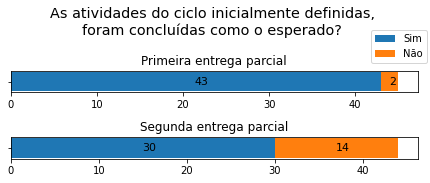

In [ ]:
#@title { display-mode: "form" }
fig, ax = plt.subplots(2, 1, figsize=(6, 2))

def build_grafico(ax, title, df):
  
  df = df[df['Q1'].notna()]
  count = df[['Q1']].groupby(by=['Q1'],dropna=False).size().reset_index(name='count')
  
  concluido_df = count[count['Q1'] == 'Sim']
  nao_concluido_df = count[count['Q1'] == 'Não']
  labels = [""]

  ax.set_title(title, fontsize="large", y=1.03)
  ax.barh(labels, concluido_df['count'], label='Sim')
  ax.barh(labels, nao_concluido_df['count'], label='Não', left=concluido_df['count'])

  for i in ax.patches:
      ax.text(i.get_x() + (i.get_width()/2) - .1, i.get_y() + (i.get_height()/2) - .1, \
              i.get_width(), fontsize=11)
build_grafico(ax[0],"Primeira entrega parcial", ep1)
build_grafico(ax[1],"Segunda entrega parcial", ep2)
fig.legend(*fig.axes[-1].get_legend_handles_labels(), loc = 'upper right', bbox_to_anchor=(1, 1.1))
fig.suptitle('As atividades do ciclo inicialmente definidas,\nforam concluídas como o esperado?', y=1.25, fontsize="x-large")
fig.tight_layout() 

A primeira entrega reuniu 43 respostas afirmativas para a questão levantada, mostrando um percentual de aproximadamente 95% dos projetos que realizaram essa entrega. É importante salientar que a primeira entrega aconteceu nas primeiras semanas de desenvolvimento, logo o planejamento dos projetos focava em introduzir o aprendiz ao ambiente de desenvolvimento, comunidade e tecnologias envolvidas no projeto. 

Na segunda entrega, houve um decréscimo na quantidade de respostas afirmativas, apenas 30 projetos finalizaram suas atividades. Nessa segunda entrega, o aprendiz já estava mais familiarizado com as tecnologias e as atividades nessa fase, em geral eram mais complexas e exigiam mais esforço para concluí-las. Além disso, os projetos que não concluiram as atividades na primeira entrega, tiveram que lidar com as atividades em atraso também, dificultando a conclusão do planejamento. 

##### Entrega Final


Por fim, foram coletadas informações sobre o projeto ao final do evento, como sendo uma última entrega. Essa entrega foi enviada por mentores e aprendizes e reuniu, respectivamente, 41 e 33 registros. Esta relação pode ser visualizada no gráfico a seguir:

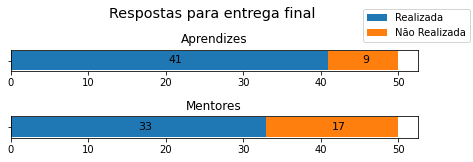

In [ ]:
#@title { display-mode: "form" }
fig, ax = plt.subplots(2, 1, figsize=(6, 2))

def build_grafico(ax, title, df):
  df['entrega'] = df['data'].notna()
  count = df[['entrega']].groupby(by=['entrega'],dropna=False).size().reset_index(name='count')
  faltas_df = count[count['entrega'] == False]
  entregas_df = count[count['entrega'] == True]
  labels = [""]

  ax.set_title(title, fontsize="large", y=1.03)
  ax.barh(labels, entregas_df['count'], label='Realizada')
  ax.barh(labels, faltas_df['count'], label='Não Realizada',left=entregas_df['count'])

  for i in ax.patches:
      ax.text(i.get_x() + (i.get_width()/2) - .1, i.get_y() + (i.get_height()/2) - .1, \
              i.get_width(), fontsize=11)
build_grafico(ax[0], "Aprendizes", ef_aprendiz)
build_grafico(ax[1], "Mentores", ef_mentoria)
fig.legend(*fig.axes[-1].get_legend_handles_labels(), loc = 'upper right', bbox_to_anchor=(1.1, 1.1))
fig.suptitle('Submissão para entrega final', y=1.1, fontsize="x-large")
fig.tight_layout() 

Levando como base as perguntas realizadas nessa entrega, foram extraídas uma sequência de características sobre o processo de desenvolvimento no evento, bem como informações sobre o projeto. É importante levar em consideração que todas as respostas representam a visão pessoal de aprendizes e mentores ao fim do projeto, podendo apresentar divergencias entre as visões das partes (aprendiz e mentor) e até mesmo não representar uma visão futura concreta do projeto, uma vez que este pode ter realizado mudanças após o término do evento.

##### TODO Análise de características levantadas na sessão seguinte

# Analizando valores obtido nas entregas


## Quantos projetos foram concluídos?
Alguns aprendizes discordaram quanto ao status final do projeto. Foram mantidas as opiniões que corresponderam entre mentor e aprendiz, e, em caso faltante, foi mantida a opinião do aprendiz, tendo em vista que não houveram casos em que o mentor respondeu e o aprendiz não.

In [ ]:
#@title { display-mode: "form" }
# Concatenação de matchs entre respostas + valores de registros de aprendizes que mentor não respondeu
merge = ef_mentoria[['Q5', 'projeto']].merge(ef_aprendiz[['Q7', 'projeto']], on='projeto', how='right')
ef_convergentes = merge[(merge['Q5'] == merge['Q7']) & (merge['Q5'].notna())]
ef_ausentes = merge[(merge['Q7'].notna()) & (merge['Q5'].isna())]
ef_mentoria_compativel = pd.concat([ef_convergentes, ef_ausentes])
ef_mentoria_compativel = ef_aprendiz[ef_aprendiz['projeto'].isin(ef_mentoria_compativel['projeto'])]
print("Somando", ef_convergentes.shape[0] , "registros de aprendizes e mentores que convergiram para a mesma resposta")
print("e os", ef_ausentes.shape[0], "em que o mentor não respondeu, temos:", ef_mentoria_compativel.shape[0])

Somando 28 registros de aprendizes e mentores que convergiram para a mesma resposta
e os 11 em que o mentor não respondeu, temos: 39


## Qual foi a taxa de intenção em continuar contribuindo para os projetos do Andromedev?


A questão 17, da entrega final do aprendiz, representava a seguinte pergunta:

 *Você irá continuar a contribuir com esse ou outro projeto dessa organização?*

Indo de 1 (muito improvável) a 5 (muito provável).




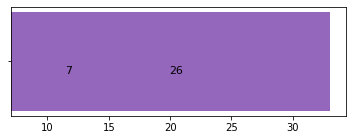

In [ ]:
aux = ef_aprendiz[['Q17', 'projeto']].groupby(by=["Q17"]).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(6, 2))
#ax.set_title(title, fontsize="x-large", y=1.03)
labels = ['']
aux=[aux[aux['Q17'] == i]['count'] for i in range(1,6)]
ax.barh(labels, aux[0], label="1")
for i in range(1, len(aux)):
  ax.barh(labels, aux[i], left=aux[i-1], label=str(i + 1))

for i in ax.patches:
  ax.text(i.get_x() + (i.get_width()/2) - .1, i.get_y() + (i.get_height()/2) - .1, \
  i.get_width(), fontsize=11)
#ax.barh(labels, faltas_df['count'], label='4',left=entregas_df['count'])
#ax.barh(labels, faltas_df['count'], label='5',left=entregas_df['count'])
#.plot(kind='bar', figsize=(11,3))

A questão 12, da entrega final do mentor, representava a seguinte pergunta:

*Você tem disponibilidade para continuar a mentorar esse ou outro projeto com o/a seu/sua aprendiz atual?*

A pergunta aceitava como resposta *Sim* e *Não*

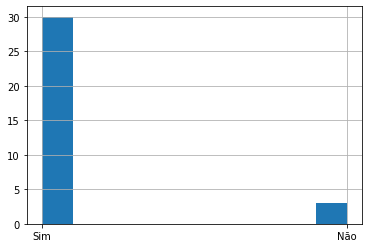

In [ ]:
ef_mentoria['Q12'].hist()

## Quais características podem associar as respostas dos aprendizes com a finalização dos projetos?

In [ ]:
#@title { display-mode: "form" }
def test_hipotheses(df, columns, significance = 0.05):
  qfirst = np.array(df[columns[0]], dtype=object)
  qsecond = np.array(df[columns[1]], dtype=object)
  #pd.Categorical(df[columns[1]], categories=categories[1])

  tabela = pd.crosstab(qfirst, qsecond)
  test_fisher(tabela, significance)
  return test_qui_square(tabela, significance)

def test_fisher(tabela, significance):  
  rpy2.robjects.numpy2ri.activate()
  stats = importr('stats')
  res = stats.fisher_test(tabela.to_numpy())
  pvalor = res[0][0]
  print('-------------------------------------------------------------------------------------')
  print("TESTE EXATO DE FISHER")
  print('p-value: {}'.format(pvalor))
  if pvalor <= significance:
    print("""Nível de significancia: %.2f\nRejeitamos a hipótese nula e aceitamos H1. Elas não são independentes.""" % (significance))
  else:
    print("""Nível de significancia: %.2f\nAceitamos a hipótese nula e aceitamos H0. Elas são independentes.""" % (significance))
  print('-------------------------------------------------------------------------------------')
  

def test_qui_square(tabela, significance):
  [xi, pvalor, degree, expected] = chi2_contingency(tabela)
  print('-------------------------------------------------------------------------------------')
  print("TESTE QUI QUADRADO")
  print('O p-valor é', pvalor)
  print('Os graus de liberdade são', degree)
  print('X²=%.6f' % (xi))
  if pvalor <= significance:
    print("""Nível de significancia: %.2f\nRejeitamos a hipótese nula e aceitamos H1. Elas não são independentes.""" % (significance))
  else:
    print("""Nível de significancia: %.2f\nAceitamos a hipótese nula e aceitamos H0. Elas são independentes.""" % (significance))
  
  print('-------------------------------------------------------------------------------------')
  return tabela

In [ ]:
#@title { display-mode: "form" }
q9 = ["Não consegui cumpri-lo.",\
          "Consegui cumpri-lo parcialmente.",\
          "Consegui segui-lo com pouco ou nenhum atraso ao fim do evento.",\
          "Consegui cumpri-lo, até mesmo indo além do esperado para a entrega final."]
q12 = ["Afetou bastante meu rendimento no projeto e não consegui conciliar os dois.",\
            "Afetou meu rendimento no projeto, mas consegui conciliar os dois.",\
            "Afetou pouco meu rendimento no projeto.",\
            "Não afetou meu rendimento no projeto."]
q13 = ["Esteve pouco presente ou completamente ausente ao longo do evento.", \
      "Esteve menos presente do que deveria.", \
      "Esteve disponível de acordo com o tempo esperado.", \
      "Esteve sempre disponível, dedicando até mais tempo do que o esperado.", \
      ]

### *O seu mentor(a) dividiu o tempo de mentoria com outros aprendizes (interno ou externo ao evento)?*





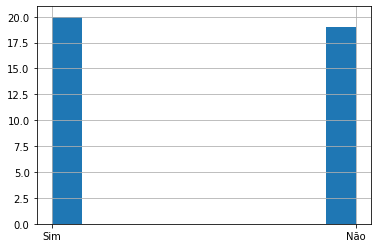

In [ ]:
ef_mentoria_compativel['Q14'].hist()

In [ ]:
test_hipotheses(ef_mentoria_compativel, ['Q7','Q14'], 0.05)

-------------------------------------------------------------------------------------
TESTE EXATO DE FISHER
p-value: 0.05616092643224247
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
TESTE QUI QUADRADO
O p-valor é 0.07928205591587292
Os graus de liberdade são 1
X²=3.079558
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------


col_0,Não,Sim
row_0,,
Não,7,14
Sim,12,6


### *Você participou de algum projeto de pesquisa ou desenvolvimento em paralelo no período do Andromedev?*


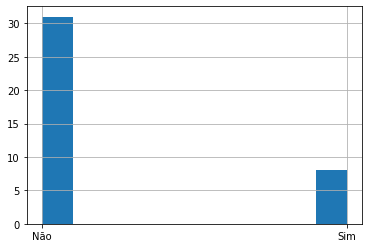

In [ ]:
ef_mentoria_compativel['Q10'].hist()

In [ ]:
test_hipotheses(ef_mentoria_compativel, ['Q7','Q10'], 0.05)

-------------------------------------------------------------------------------------
TESTE EXATO DE FISHER
p-value: 0.7023247023247022
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
TESTE QUI QUADRADO
O p-valor é 0.8784176112494346
Os graus de liberdade são 1
X²=0.023401
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------


col_0,Não,Sim
row_0,,
Não,16,5
Sim,15,3


### *Quem realizou a maior parte do acompanhamento no projeto?*

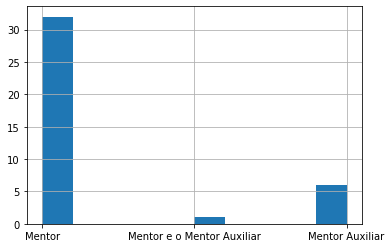

In [ ]:
ef_mentoria_compativel['Q5'].hist()

In [ ]:
test_hipotheses(ef_mentoria_compativel, ['Q7','Q5'])

-------------------------------------------------------------------------------------
TESTE EXATO DE FISHER
p-value: 0.022321917058759102
Nível de significancia: 0.05
Rejeitamos a hipótese nula e aceitamos H1. Elas não são independentes.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
TESTE QUI QUADRADO
O p-valor é 0.03119074294812961
Os graus de liberdade são 2
X²=6.935268
Nível de significancia: 0.05
Rejeitamos a hipótese nula e aceitamos H1. Elas não são independentes.
-------------------------------------------------------------------------------------


col_0,Mentor,Mentor Auxiliar,Mentor e o Mentor Auxiliar
row_0,,,
Não,15,6,0
Sim,17,0,1


### *Em relação à dedicação esperada de minha mentora/ meu mentor...*

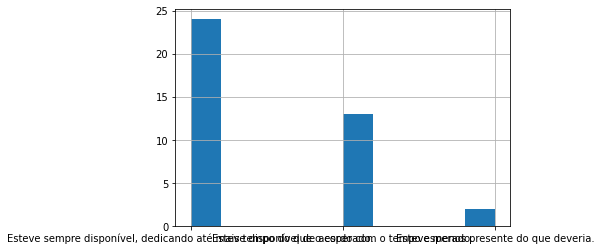

In [ ]:
ef_mentoria_compativel['Q13'].hist()

In [ ]:
test_hipotheses(ef_mentoria_compativel, ['Q7','Q13'])

-------------------------------------------------------------------------------------
TESTE EXATO DE FISHER
p-value: 0.7510026155187465
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
TESTE QUI QUADRADO
O p-valor é 0.7726442873297509
Os graus de liberdade são 2
X²=0.515873
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------


col_0,Esteve disponível de acordo com o tempo esperado.,Esteve menos presente do que deveria.,"Esteve sempre disponível, dedicando até mais tempo do que o esperado."
row_0,,,
Não,6,1,14
Sim,7,1,10


### *Qual foi o meio de comunicação predominante na execução do seu projeto?*


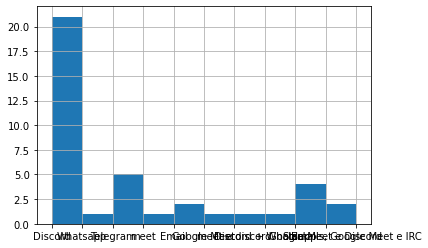

In [ ]:
ef_mentoria_compativel['Q6'].hist()

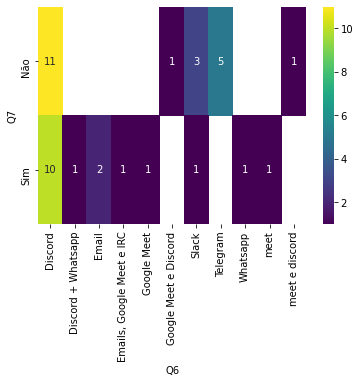

In [ ]:
q6 = list(dict.fromkeys(ef_mentoria_compativel['Q6']) )
comunicacao_perfil = ef_mentoria_compativel[['Q6', 'Q7', 'projeto']].groupby(by=['Q6', 'Q7'], axis=0).count()
sns.heatmap(comunicacao_perfil.unstack(0)['projeto'],cmap="viridis", annot=True, fmt='g')


In [ ]:
test_hipotheses(ef_mentoria_compativel, ['Q7','Q6'])

-------------------------------------------------------------------------------------
TESTE EXATO DE FISHER
p-value: 0.03983717532104668
Nível de significancia: 0.05
Rejeitamos a hipótese nula e aceitamos H1. Elas não são independentes.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
TESTE QUI QUADRADO
O p-valor é 0.13556227296677
Os graus de liberdade são 10
X²=14.905045
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------


col_0,Discord,Discord + Whatsapp,Email,"Emails, Google Meet e IRC",Google Meet,Google Meet e Discord,Slack,Telegram,Whatsapp,meet,meet e discord
row_0,,,,,,,,,,,
Não,11,0,0,0,0,1,3,5,0,0,1
Sim,10,1,2,1,1,0,1,0,1,1,0



*   Mudanças de escopo ajudaram a refinar os projetos
*   Atrasos e faltas de entrega tem correlação

## Quais características podem associar as respostas dos aprendizes com o desejo de continuar contribuindo?


### *O seu mentor(a) dividiu o tempo de mentoria com outros aprendizes (interno ou externo ao evento)?*





In [ ]:
test_hipotheses(ef_mentoria_compativel, ['Q17','Q14'])

-------------------------------------------------------------------------------------
TESTE EXATO DE FISHER
p-value: 0.1050052674079387
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
TESTE QUI QUADRADO
O p-valor é 0.07568432475970441
Os graus de liberdade são 2
X²=5.162368
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------


col_0,Não,Sim
row_0,,
3.0,2,6
4.0,1,4
5.0,16,10


### *Você participou de algum projeto de pesquisa ou desenvolvimento em paralelo no período do Andromedev?*


In [ ]:
test_hipotheses(ef_mentoria_compativel, ['Q17','Q10'])

-------------------------------------------------------------------------------------
TESTE EXATO DE FISHER
p-value: 0.5958497196887318
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
TESTE QUI QUADRADO
O p-valor é 0.32293883509906396
Os graus de liberdade são 2
X²=2.260585
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------


col_0,Não,Sim
row_0,,
3.0,7,1
4.0,5,0
5.0,19,7


### *Quem realizou a maior parte do acompanhamento no projeto?*

In [ ]:
test_hipotheses(ef_mentoria_compativel, ['Q17','Q5'])

-------------------------------------------------------------------------------------
TESTE EXATO DE FISHER
p-value: 0.23135632113960133
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
TESTE QUI QUADRADO
O p-valor é 0.3515334003971871
Os graus de liberdade são 4
X²=4.425000
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------


col_0,Mentor,Mentor Auxiliar,Mentor e o Mentor Auxiliar
row_0,,,
3.0,6,2,0
4.0,3,2,0
5.0,23,2,1


### *Em relação à dedicação esperada de minha mentora/ meu mentor...*

In [ ]:
test_hipotheses(ef_mentoria_compativel, ['Q17','Q13'])

-------------------------------------------------------------------------------------
TESTE EXATO DE FISHER
p-value: 0.6449764886263052
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
TESTE QUI QUADRADO
O p-valor é 0.5751878832272033
Os graus de liberdade são 4
X²=2.897115
Nível de significancia: 0.05
Aceitamos a hipótese nula e aceitamos H0. Elas são independentes.
-------------------------------------------------------------------------------------


col_0,Esteve disponível de acordo com o tempo esperado.,Esteve menos presente do que deveria.,"Esteve sempre disponível, dedicando até mais tempo do que o esperado."
row_0,,,
3.0,2,0,6
4.0,3,0,2
5.0,8,2,16


### *Qual foi o meio de comunicação predominante na execução do seu projeto?*


In [ ]:
test_hipotheses(ef_mentoria_compativel, ['Q17','Q6'])

-------------------------------------------------------------------------------------
TESTE EXATO DE FISHER
p-value: 0.013237182444798956
Nível de significancia: 0.05
Rejeitamos a hipótese nula e aceitamos H1. Elas não são independentes.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
TESTE QUI QUADRADO
O p-valor é 0.040859540398553704
Os graus de liberdade são 20
X²=32.234821
Nível de significancia: 0.05
Rejeitamos a hipótese nula e aceitamos H1. Elas não são independentes.
-------------------------------------------------------------------------------------


col_0,Discord,Discord + Whatsapp,Email,"Emails, Google Meet e IRC",Google Meet,Google Meet e Discord,Slack,Telegram,Whatsapp,meet,meet e discord
row_0,,,,,,,,,,,
3.0,3,0,1,0,1,1,1,1,0,0,0
4.0,1,0,1,0,0,0,3,0,0,0,0
5.0,17,1,0,1,0,0,0,4,1,1,1



*   Mudanças de escopo ajudaram a refinar os projetos
*   Atrasos e faltas de entrega tem correlação

## Referências


https://www.python-ds.com/python-chi-square-test